In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

Nome: Alex Sandro Oliveira


Questão 1
---------

Problem1.1 Let us assume that F1(x) and F2(x) are two cdf satisfying
$$F_1(x) \leq F_2(x)$$ for all values of x.

1. Which of these two distributions has the heavier lower tail? Explain.
**Resposta:**
*Resposta: $F_2(x)$ possui a calda a esquerda mais pesada. para um dado $x$ a esquerda $F_2(x)$ será maior ou igual a $F_1(x)$ por definição.*


2. Which of these two distributions has the heavier upper tail? Explain.
**Resposta:**
*$F_1(x)$ possui a calda a direita  mais pesada. para um dado $x$ a direita $F_2(x)$ será maior ou igual a $F_1(x)$ por definição. O que implica que para um dado valor de $p$ $F_1^{-1}(x)$ será menor que ou igual a $F_2^{-1}(x)$.*


3. If these two distributions are proposed as models for the returns of a given portfolio over
the next month, and if you are asked to compute $VaR_{0.01}$ for this portfolio over that
period, which of these two distributions will give the larger value at risk? 
**Resposta:**
*Quando $x$ tende a $\infty$ como $F_2(X)$ vai para infinito mais rápido que $F_1(x)$, desta maneira $F_2$ fornecerá o maior $VaR$ por que possui a calda mais pesada.*



Questão 2
--------
1. In R, generate a sample of size N = 1,024 from the exponential distribution
with rate parameter r = 0.2. Call X the vector containing the sample values.




In [2]:
from scipy.stats import expon

n = 1024
r = 2

x = expon.rvs(size=n, scale=1/r)
x


array([0.05463084, 0.12898761, 0.17851637, ..., 0.14481898, 0.52228548,
       1.36893206])

Questão 2
--------

**2.2** Plot on the same graph, the exact (theoretical) density of the distribution of X, and a
histogram of X. It is recommended to try several values for the numbers of bins, and to
report only the result found most satisfactory.

Text(0.5,1,'Ques.2')

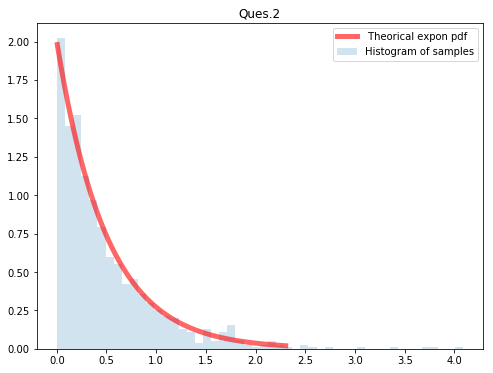

In [3]:
# Creating a graph
f, ax = plt.subplots(1,1, figsize=(8, 6))


# samples values
n = 1024
r = 2
x = expon.rvs(size=n, scale=1/r)


ax.hist(x, alpha=0.2, density=True, label='Histogram of samples', bins=50)

# True exponential distribution
y = np.linspace(expon.ppf(0.01, scale=1/r),
                expon.ppf(0.99, scale=1/r), n)
ax.plot(y, expon.pdf(y, scale=1/r),'r-', lw=5, alpha=0.6, label=' Theorical expon pdf')
ax.legend(loc='best')
ax.set_title('Ques.2' )


3. Plot on the same graph, the same theoretical density as before, together with a kernel
density estimate of the distribution of X. Again, it is recommended to try several values of
the bandwidth, and to report only the result found most satisfactory.


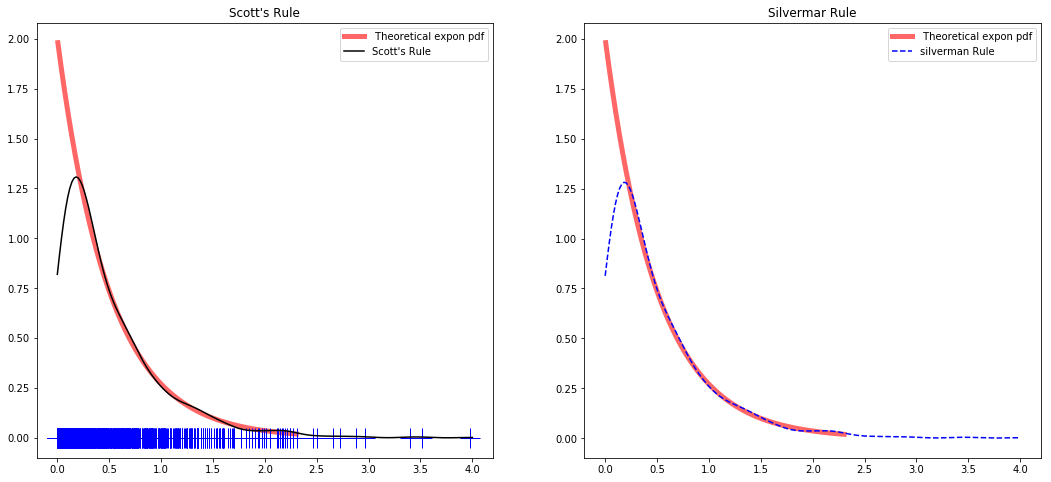

In [4]:
from scipy import stats



# Creating a graph
f, ax = plt.subplots(1,2, figsize=(18, 8))

# samples values
n = 1024
r = 2
x = expon.rvs(size=n, scale=1/r)

# ' Theoretical exponential pdf'
ax[0].plot(y, expon.pdf(y, scale=1/r),'r-', lw=5, alpha=0.6, label=' Theoretical expon pdf')
ax[1].plot(y, expon.pdf(y, scale=1/r),'r-', lw=5, alpha=0.6, label=' Theoretical expon pdf')


# Density estimate

kde1 = stats.gaussian_kde(x)


# Rug plot of samples
ax[0].plot(x, np.zeros(x.shape), 'b+', ms=20)  # rug plot
xeval = np.linspace(0, 4, num=200)
ax[0].plot(xeval, kde1(xeval), 'k-', label="Scott's Rule")
ax[0].set_title("Scott's Rule")
ax[0].legend()

kde2 = stats.gaussian_kde(x, bw_method='silverman')
ax[1].plot(xeval, kde2(xeval), 'b--', label="silverman Rule")
ax[1].set_title("Silvermar Rule")
ax[1].legend()

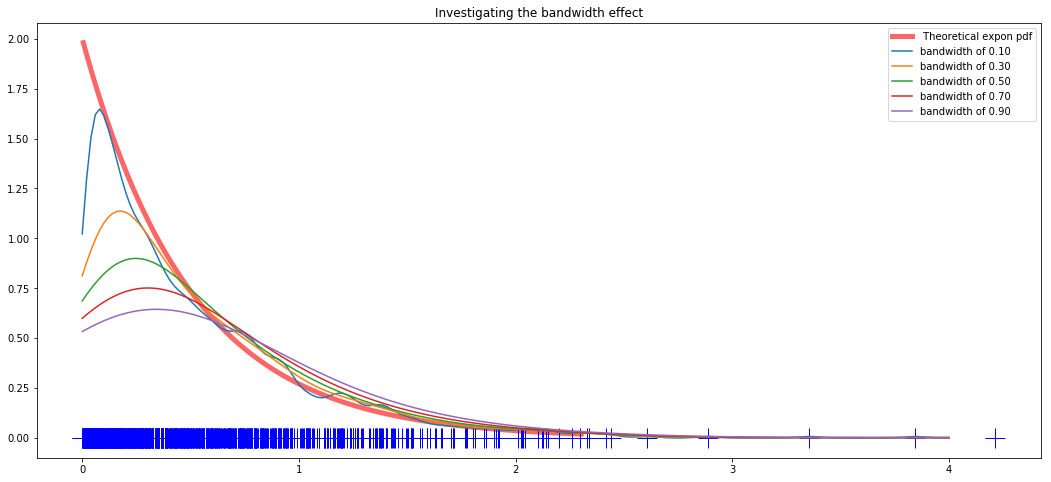

In [5]:
from scipy import stats

bandwidth = np.linspace(0.1, 0.9, 5)

# Creating a graph
f, ax = plt.subplots(1,1, figsize=(18, 8))

# samples values
n = 1024
r = 2
x = expon.rvs(size=n, scale=1/r)

# ' Theoretical exponential pdf'
ax.plot(y, expon.pdf(y, scale=1/r),'r-', lw=5, alpha=0.6, label=' Theoretical expon pdf')



# Density estimate

ax.plot(x, np.zeros(x.shape), 'b+', ms=20)  # rug plot
xeval = np.linspace(0, 4, num=200)

for ban in bandwidth:
    kde = stats.gaussian_kde(x, bw_method=ban)
    ax.plot(xeval, kde(xeval), label="bandwidth of {:1.2f}".format(ban))

ax.set_title("Investigating the bandwidth effect")
ax.legend()



4. Compare the two plots and explain the reasons for the differences. Say which estimate of
the density you prefer, and explain why.

**Resposta**

Acredito que o histograma consiga capturar melhor o formato da distribuição. A aproximação pelo método de kernel ou suaviza a curva de maneira indesejada, com valores grandes de banda, ou coloca uma subida repentina no pico que considero ser estranha para uma distribuição que não simetrica, como a exponencial.


Questão 3
---------
<img src="img/1_3.PNG">

Problem1.3 Give an interpretation to each of the following four Q-Q plots of Fig. 1.27.




**Resposta:**

*figura superior esquerdo* -- A distribuição YY possui a calda superior e inferior mais que uma distribuição normal. Como a ditribuição normal é simétrica e o qqplot da distribuição YY contra a normal também é simetrico, a distribuição Yy É simétrica 

*figura superior direito*  -- A distribuição ZZ possui a calda a esquerda mais pesada que a calda de uma distribuição normal. Nas outras 
partes ela se aproxima razoavelmente de uma distribuição normal. Não é simétrica. 

*inferior esquerdo* -- 

*inferior direiro*  -- 

Questão 4
---------

1. As explained in the caption, the plots of Fig. 1.28 were produced with the R
command qqnorm. Articulate properties of the distributions of XX and YY which you
can infer from these plots.



Questão 9
----------

Problem1.9 The goal of this problem is to design and use a home-grown random number
generator for the exponential distribution. For the first question of this problem, you are not
allowed to use any of the functions dexp, pexp, qexp or obviously rexp.

1. Recall the formulas derived in the text for the cdf Fλ(x) = P{X ≤ x} of a random
variable X with an exponential distribution with scale parameter λ > 0. and its inverse
F
−1
λ and write an R function myrexp which takes the parameters N, and LAMBDA, and
which returns a numeric vector of length N containing N samples of random variates from
the exponential distribution with scale parameter LAMBDA.


(array([671., 216.,  88.,  31.,   7.,   7.,   2.,   0.,   1.,   1.]),
 array([3.66784369e-03, 1.55593164e+00, 3.10819544e+00, 4.66045924e+00,
        6.21272305e+00, 7.76498685e+00, 9.31725065e+00, 1.08695144e+01,
        1.24217782e+01, 1.39740420e+01, 1.55263058e+01]),
 <a list of 10 Patch objects>)

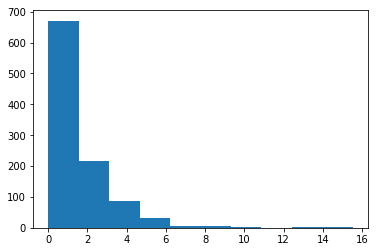

In [81]:
# Importing package to generate
# Importing package to generate
from scipy.stats import uniform

plt.plot()

def myrexp(n, lbd):
    
    dist = -(lbd) * np.log(1-uniform.rvs(scale=1, size=n))
    
    return dist

plt.hist(myrexp(1024, lbd=1.5))

2. Use your function myrexp to generate 
a sample of size N = 1,024 from the exponential
distribution with mean 1.5, use the R function rexp to generate a sample of the size 2N
from the same distribution, and produce a Q-Q plot of the two samples. Are you satisfied
with the performance of your simulation function myrexp? Explain why.

Text(0.5,1,'QQ-plot of myrexp')

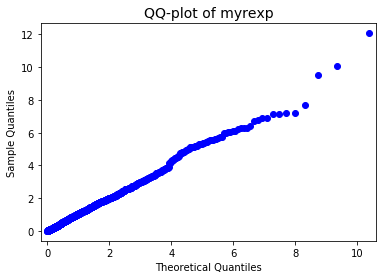

In [92]:
from scipy.stats import expon
from statsmodels.graphics.gofplots import qqplot

n = 1024
scale = 1.5
qsample = qqplot(myrexp(n, scale), expon,  scale=scale, fit=False)

qsample.get_axes()[0].set_title('QQ-plot of myrexp', size=14)


Text(0.5,1,'QQ-plot of system random number genarate of the system')

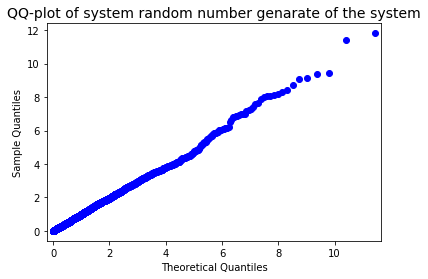

In [93]:
qsystemrvs =  qqplot(expon.rvs(size=2*n, scale=scale), expon,  scale=scale, fit=False)
qsystemrvs.get_axes()[0].set_title('QQ-plot of system random number genarate of the system', size=14)